In [1]:
import little_mallet_wrapper as tm
import pandas as pd
import os
import json
import spacy
import re

In [2]:
path = path = "./Korpus/"
nlp = spacy.load("de_core_news_sm")

In [3]:
data = pd.DataFrame()
for file in os.listdir(path):
    to_append = json.load(open(f"{path}{file}"))
    data = data.append(to_append, ignore_index=True)

In [4]:
print(set(data.category))
data.head()

{'Weihnachtsfilm', 'Märchenfilm', 'Agentenfilm', 'Roadmovie', 'Martial-Arts-Film', 'Splatterfilm', 'Heimatfilm'}


,category,date,link,text,title
0,Märchenfilm,09-06-2021 15:36:09,https://de.wikipedia.org/wiki/1001%5FNacht%5F%...,Im Abendland zu unbestimmter Zeit zieht der Va...,1001 Nacht (1945)
1,Splatterfilm,09-06-2021 15:33:54,https://de.wikipedia.org/wiki/2001%5FManiacs,Die drei College-Studenten Cory (Matthew Carey...,2001 Maniacs
2,Roadmovie,09-06-2021 15:34:35,https://de.wikipedia.org/wiki/25%5Fkm%2Fh,Auf der Beerdigung ihres Vaters sehen sich die...,25 km/h
3,Roadmovie,09-06-2021 15:34:36,https://de.wikipedia.org/wiki/303%5F%28Film%29,Die 24-jährige Biologiestudentin Jule fällt du...,303 (Film)
4,Agentenfilm,09-06-2021 15:37:05,https://de.wikipedia.org/wiki/36%5FStunden,Der amerikanische Geheimdienstoffizier Major P...,36 Stunden


In [5]:
##### configuration
path_to_mallet_exec = r'e:\Programme\mallet-2.0.8\bin\mallet.bat'
num_topics = 7

In [6]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [7]:
training_data = data["text"]
stopwords = list(spacy.lang.de.stop_words.STOP_WORDS)

In [8]:
training_data = [tm.process_string(remove_umlaut(text), stop_words=stopwords, numbers="remove") for text in training_data]

In [9]:
topics, probabilities = tm.quick_train_topic_model(path_to_mallet=path_to_mallet_exec, 
                                                   output_directory_path='topic', 
                                                   num_topics=num_topics, 
                                                   training_data=training_data)

Importing data...
Complete
Training topic model...
Complete


In [10]:
#show topics
for c, t in enumerate(topics):
    print(f'topic {c}: {" ".join(t[:5])}')

topic 0: fuer vater mutter familie ueber
topic 1: maria dorf peter thomas tochter
topic 2: scrooge geist harry auto reise
topic 3: bond fuer agenten ueber cia
topic 4: kampf son lee toeten schliesslich
topic 5: waehrend mike anschliessend toetet flucht
topic 6: koenig prinzessin prinz schloss fuer


In [11]:
for c, t in enumerate(topics):
    print(f'topic {c}: {" ".join(t)}')

topic 0: fuer vater mutter familie ueber frau zurueck leben mann waehrend haus sohn kinder laesst findet tochter naechsten weg versucht weihnachten
topic 1: maria dorf peter thomas tochter toni hans franz fuer wiederum anna andreas martin heiraten karl heidi helga jakob junge verliebt
topic 2: scrooge geist harry auto reise fahren new george faehrt fahrt kevin geld ueber film jim waehrend polizei freunde schliesslich bob
topic 3: bond fuer agenten ueber cia deutschen agent auftrag gelingt waehrend koennen schliesslich informationen london geheimdienst laesst daraufhin entkommen trifft erfaehrt
topic 4: kampf son lee toeten schliesslich kaempfer fuer jason gelingt goku waehrend getoetet kaempfen meister besiegen toetet johnny hilfe schwert besiegt
topic 5: waehrend mike anschliessend toetet flucht versucht polizei gelingt auto haus toeten gruppe getoetet mann frau scott ueber alex fliehen freundin
topic 6: koenig prinzessin prinz schloss fuer bearbeiten wald frau maedchen koenigin laess

In [12]:
#show topic distribution for each document
for c, prob in enumerate(probabilities):
    print(f'{data.title[c]}: {[round(i, 2) for i in prob]}')

1001 Nacht (1945): [0.21, 0.0, 0.0, 0.01, 0.0, 0.0, 0.78]
2001 Maniacs: [0.39, 0.03, 0.26, 0.0, 0.0, 0.32, 0.0]
25 km/h: [0.46, 0.23, 0.3, 0.01, 0.0, 0.0, 0.0]
303 (Film): [0.64, 0.0, 0.3, 0.0, 0.0, 0.02, 0.04]
36 Stunden: [0.27, 0.02, 0.0, 0.71, 0.0, 0.0, 0.0]
3 from Hell: [0.25, 0.01, 0.0, 0.05, 0.0, 0.69, 0.0]
3 Ninja Kids: [0.34, 0.0, 0.0, 0.01, 0.47, 0.18, 0.0]
4 Könige: [0.39, 0.0, 0.0, 0.0, 0.06, 0.54, 0.0]
5 Seasons: [0.21, 0.04, 0.0, 0.0, 0.02, 0.73, 0.0]
7th Day: [0.44, 0.0, 0.0, 0.13, 0.0, 0.41, 0.02]
7 Zwerge – Der Wald ist nicht genug: [0.29, 0.0, 0.0, 0.02, 0.0, 0.13, 0.55]
7 Zwerge – Männer allein im Wald: [0.24, 0.0, 0.0, 0.0, 0.0, 0.11, 0.65]
Aaltra: [0.49, 0.0, 0.49, 0.0, 0.0, 0.02, 0.0]
Abenteuer im Spielzeugland: [0.38, 0.08, 0.0, 0.0, 0.01, 0.52, 0.0]
Abenteuer im Zauberwald: [0.24, 0.0, 0.0, 0.0, 0.0, 0.02, 0.74]
Abenteuer in Jerusalem – Jesus und die Tiere: [0.81, 0.0, 0.01, 0.05, 0.0, 0.05, 0.09]
Abenteuer mit der Tarnkappe: [0.11, 0.0, 0.01, 0.01, 0.0, 0.0, 0.8

James Bond 007 – Liebesgrüße aus Moskau: [0.09, 0.0, 0.0, 0.84, 0.0, 0.06, 0.0]
James Bond 007 – Lizenz zum Töten: [0.11, 0.0, 0.0, 0.75, 0.04, 0.1, 0.01]
James Bond 007 – Man lebt nur zweimal: [0.04, 0.0, 0.0, 0.7, 0.15, 0.11, 0.01]
James Bond 007 – Moonraker – Streng geheim: [0.11, 0.0, 0.0, 0.75, 0.02, 0.07, 0.05]
James Bond 007 – Octopussy: [0.12, 0.01, 0.0, 0.69, 0.08, 0.1, 0.01]
James Bond 007 – Stirb an einem anderen Tag: [0.1, 0.0, 0.0, 0.73, 0.14, 0.01, 0.02]
James Bond – 007 jagt Dr. No: [0.11, 0.0, 0.0, 0.76, 0.13, 0.0, 0.0]
James jr. schlägt zu: [0.32, 0.0, 0.0, 0.59, 0.07, 0.0, 0.0]
Jason Bourne (Film): [0.08, 0.0, 0.0, 0.85, 0.06, 0.0, 0.0]
Jay und Silent Bob schlagen zurück: [0.35, 0.0, 0.41, 0.01, 0.0, 0.23, 0.0]
Jeanny und der Weihnachtsmann: [0.88, 0.0, 0.09, 0.0, 0.01, 0.01, 0.0]
Jean Seberg – Against all Enemies: [0.17, 0.16, 0.24, 0.42, 0.0, 0.0, 0.0]
Jede Frau braucht einen Engel: [0.86, 0.02, 0.01, 0.1, 0.0, 0.0, 0.0]
Jennerwein (Film): [0.29, 0.62, 0.0, 0.0, 0.0

Stranger than Paradise: [0.29, 0.0, 0.7, 0.0, 0.0, 0.0, 0.0]
Strawberry Bubblegums: [0.61, 0.05, 0.29, 0.03, 0.0, 0.0, 0.01]
Street Fighter: The Legend of Chun-Li: [0.33, 0.0, 0.0, 0.02, 0.62, 0.03, 0.0]
Street Fighter – Die entscheidende Schlacht: [0.04, 0.0, 0.0, 0.15, 0.65, 0.16, 0.0]
Stubbe – Von Fall zu Fall: Tödliche Bescherung: [0.29, 0.07, 0.21, 0.41, 0.0, 0.01, 0.0]
Subconscious Cruelty: [0.22, 0.02, 0.0, 0.02, 0.0, 0.74, 0.0]
Sudden Slaughter – Knochenwald 3: [0.15, 0.0, 0.0, 0.0, 0.0, 0.65, 0.19]
Sugarland Express: [0.27, 0.0, 0.0, 0.0, 0.0, 0.73, 0.0]
Summer in the City (Film): [0.69, 0.04, 0.19, 0.05, 0.0, 0.04, 0.0]
Sumurun (1920): [0.2, 0.33, 0.03, 0.34, 0.03, 0.05, 0.03]
Superfighter 2: [0.14, 0.0, 0.0, 0.09, 0.61, 0.0, 0.15]
Supernova (2020): [0.84, 0.0, 0.06, 0.06, 0.0, 0.0, 0.03]
Super süß und super sexy: [0.6, 0.23, 0.0, 0.0, 0.0, 0.16, 0.0]
Surf Ninjas: [0.07, 0.0, 0.0, 0.01, 0.69, 0.18, 0.05]
Survival of the Dead: [0.11, 0.01, 0.01, 0.27, 0.01, 0.6, 0.01]
Suspiria

Wish for Christmas – Glaube an Weihnachten: [0.69, 0.14, 0.0, 0.0, 0.16, 0.0, 0.0]
WolfCop: [0.3, 0.0, 0.0, 0.06, 0.29, 0.34, 0.01]
Woodoo – Die Schreckensinsel der Zombies: [0.14, 0.04, 0.16, 0.23, 0.01, 0.42, 0.0]
Wo der Wildbach rauscht: [0.25, 0.63, 0.0, 0.0, 0.0, 0.0, 0.12]
Wo die alten Wälder rauschen: [0.48, 0.51, 0.0, 0.0, 0.0, 0.01, 0.0]
Wrong Turn: [0.11, 0.0, 0.0, 0.0, 0.0, 0.88, 0.0]
Wrong Turn 2: Dead End: [0.17, 0.0, 0.0, 0.0, 0.02, 0.81, 0.0]
Wrong Turn 3: Left For Dead: [0.05, 0.0, 0.08, 0.0, 0.0, 0.86, 0.0]
Wrong Turn 4: Bloody Beginnings: [0.2, 0.0, 0.0, 0.0, 0.0, 0.8, 0.01]
Wrong Turn 5: Bloodlines: [0.05, 0.0, 0.0, 0.0, 0.03, 0.92, 0.0]
Wrong Turn 6: Last Resort: [0.35, 0.0, 0.25, 0.03, 0.0, 0.36, 0.0]
Wundervolles Weihnachten: [0.57, 0.05, 0.36, 0.01, 0.0, 0.0, 0.0]
Wunder einer Nacht: [0.34, 0.49, 0.0, 0.0, 0.0, 0.02, 0.16]
Wunder einer Winternacht – Die Weihnachtsgeschichte: [0.98, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]
Wunder in San Francisco: [0.51, 0.31, 0.1, 0.0, 0.0

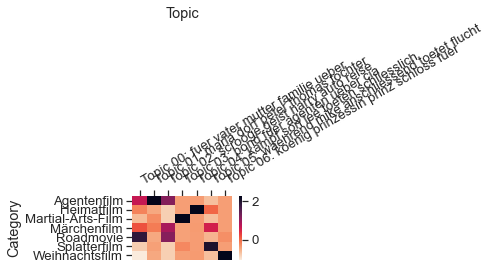

In [13]:
labels = set(data.category)
tm.plot_categories_by_topics_heatmap(labels=labels, 
                                     topic_distributions=probabilities, 
                                     topic_keys=topics, 
                                     output_path=None, 
                                     target_labels=None, 
                                     dim=None)